# 분석준비

In [111]:

# 필요 라이브러리

# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import os
from datetime import datetime

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')

# pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)
sns.set(font_scale=1)

In [112]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [95]:
log = pd.read_csv('logs.txt',index_col=0)
log

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main
...,...,...,...,...,...,...,...
301856,CLOSE,View,XLSX,2ed068d5e6a72e80e4a997c01c59f782,OTHERAPP,2016.7.7,Main
301857,OPEN,NoView,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016.7.5,Main
301858,RESET,View,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016.7.5,Main
301859,OPEN,NoView,PPT,9b5ee236571c2fcbe25132b6ba71d764,OTHERAPP,2016.7.14,Main


In [4]:
log.columns

Index(['actiontype', 'ismydoc', 'ext', 'sessionid', 'documentposition',
       'datetime', 'screen'],
      dtype='object')

In [5]:
# 데이터 정보 - 현재 결측치 없음.
log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   actiontype        301861 non-null  object
 1   ismydoc           301861 non-null  object
 2   ext               301861 non-null  object
 3   sessionid         301861 non-null  object
 4   documentposition  301861 non-null  object
 5   datetime          301861 non-null  object
 6   screen            301861 non-null  object
dtypes: object(7)
memory usage: 18.4+ MB


In [6]:
# 컬럼들의 유니크값
for i in log.columns:
    print(f'{i}의 유니크값 : ',log[i].nunique())
    print(log[i].unique())
    print('-----------------------------------------------------')

actiontype의 유니크값 :  8
['OPEN' 'CLOSE' 'RESET' 'SAVEAS' 'SAVE' 'SAVEAS_OTHER' 'EXPORT_SAME'
 'EXPORT']
-----------------------------------------------------
ismydoc의 유니크값 :  2
['NoView' 'View']
-----------------------------------------------------
ext의 유니크값 :  16
['PDF' 'HWP' 'XLSX' 'PPT' 'DOCX' 'ODT' 'DOC' 'XLS' 'PPTX' 'TXT' 'PPS'
 'PPSX' 'WORD' 'PNG' 'JPG' 'SHEET']
-----------------------------------------------------
sessionid의 유니크값 :  114994
['9400fd2e43d7dc2d054ca78806236ee1' 'f191063c562691041dfa935ff0876975'
 '3747719d8f6bdd334703320433928d5a' ... '2ed068d5e6a72e80e4a997c01c59f782'
 '41b8c1df291edd2aec30fc610e5b676e' '9b5ee236571c2fcbe25132b6ba71d764']
-----------------------------------------------------
documentposition의 유니크값 :  7
['LOCALSTORAGE' 'MYPOLARISDRIVE' 'OTHERAPP' 'NEWDOCUMENT' 'NONE'
 'OTHERCLOUD' 'SHAREDDOCUMENT']
-----------------------------------------------------
datetime의 유니크값 :  30
['2016.7.18' '2016.7.6' '2016.7.20' '2016.7.28' '2016.7.19' '2016.7.24'
 '2016.

* PDF: Adobe Portable Document Format
* HWP: 한글 워드 프로세서 문서
* XLSX: Microsoft Excel 파일
* PPT: Microsoft PowerPoint 프레젠테이션 파일
* DOCX: Microsoft Word 문서 파일
* ODT: OpenDocument 텍스트 문서
* DOC: Microsoft Word 문서 파일 (구 버전)
* XLS: Microsoft Excel 파일 (구 버전)
* PPTX: Microsoft PowerPoint 프레젠테이션 파일 (구 버전)
* TXT: 텍스트 파일
* PPS: Microsoft PowerPoint 슬라이드 쇼 파일
* PPSX: Microsoft PowerPoint 슬라이드 쇼 파일 (구 버전)
* WORD: Microsoft Word 문서 파일 (일반적인 약어)
* PNG: 포터블 네트워크 그래픽 파일 (이미지)
* JPG: Joint Photographic Experts Group 파일 (이미지)
* SHEET: 스프레드시트 파일 (일반적인 약어)

In [96]:
# 구버전 사용율이 높은지 확인해보기 위해 구버전 유무에 대한 컬럼 생성
log['version_old'] = log['ext'].apply(lambda x: '사용' if x in ('DOC','XLS','PPTX','PPSX') else '미사용')

In [97]:
# session_id는 정수값으로 대체.
mapping = {}

# 주어진 문자열을 순회하면서 번호 매김
for item in log['sessionid']:
    if item in mapping:  # 이미 매핑된 문자인 경우
        pass
    else:  # 처음 나타나는 문자인 경우 새 번호를 부여
        new_number = len(mapping) + 1
        mapping[item] = new_number
    

log['sessionid'] = log['sessionid'].apply(lambda x : mapping[x])

In [98]:
# datetime은 데이터타입 변환
log.datetime = pd.to_datetime(log.datetime)

In [99]:
# 요일 컬럼 생성
log['week'] = log['datetime'].dt.day_name()

In [100]:
# 세션아이디별 날짜 정렬
log = log.sort_values(['sessionid','datetime'])

In [82]:
tmp = log.groupby('sessionid').agg({'datetime':['first','last']}).reset_index()
tmp['diff'] = (tmp[( 'datetime',  'last')]-tmp[( 'datetime', 'first')]).dt.days
tmp[('diff',)].describe()

count    114994.000000
mean          0.013549
std           0.267669
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: (diff,), dtype: float64

In [10]:
tmp[tmp[('diff',)]==4]

sessionid   datetime            diff
                      first       last     
3486        3487 2016-07-24 2016-07-28    4
24272      24273 2016-07-02 2016-07-06    4
31888      31889 2016-07-21 2016-07-25    4
58796      58797 2016-07-17 2016-07-21    4
71114      71115 2016-07-10 2016-07-14    4
74509      74510 2016-07-25 2016-07-29    4
85500      85501 2016-07-07 2016-07-11    4
99316      99317 2016-07-22 2016-07-26    4
108040    108041 2016-07-15 2016-07-19    4
109374    109375 2016-07-06 2016-07-10    4
114830    114831 2016-07-02 2016-07-06    4

In [101]:
log.reset_index(inplace=True)

In [103]:
log.drop(columns=['index'],inplace=True)

In [104]:
log[log.sessionid==58797]

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,version_old,week
153970,CLOSE,NoView,DOCX,58797,NONE,2016-07-17,InProduct_Mob,미사용,Sunday
153971,OPEN,NoView,DOCX,58797,OTHERAPP,2016-07-17,Main,미사용,Sunday
153972,OPEN,NoView,DOCX,58797,MYPOLARISDRIVE,2016-07-17,Pub_Dir,미사용,Sunday
153973,OPEN,View,DOCX,58797,MYPOLARISDRIVE,2016-07-21,Pub_Dir,미사용,Thursday


In [105]:

# 세션을 재정의하면서 고유한 세션 ID 부여
session_ids = [1]
current_session_id = 1
for i in range(len(log)-1):
    if (log['sessionid'][i] == log['sessionid'][i+1]):
        if log['datetime'][i] == log['datetime'][i+1]:
            session_ids.append(current_session_id)
        else:
            current_session_id += 1
            session_ids.append(current_session_id)
    else:
        current_session_id += 1
        session_ids.append(current_session_id)
    if i==len(log)-1:
        session_ids.append(session_ids[-1])

# 데이터프레임에 세션 ID 추가
log['sessionid_new'] = session_ids

In [122]:
log

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,version_old,week,sessionid_new
0,OPEN,NoView,PDF,1,LOCALSTORAGE,2016-07-18,Per_Dir,미사용,Monday,1
1,CLOSE,NoView,PDF,1,LOCALSTORAGE,2016-07-18,Per_Dir,미사용,Monday,1
2,OPEN,View,PDF,1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,미사용,Monday,1
3,CLOSE,View,PDF,1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,미사용,Monday,1
4,OPEN,NoView,PDF,2,OTHERAPP,2016-07-06,Main,미사용,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...
301856,CLOSE,View,XLSX,114992,OTHERAPP,2016-07-07,Main,미사용,Thursday,115940
301857,OPEN,NoView,DOCX,114993,OTHERAPP,2016-07-05,Main,미사용,Tuesday,115941
301858,RESET,View,DOCX,114993,OTHERAPP,2016-07-05,Main,미사용,Tuesday,115941
301859,OPEN,NoView,PPT,114994,OTHERAPP,2016-07-14,Main,미사용,Thursday,115942


# 분석

Text(0, 0.5, '건수')

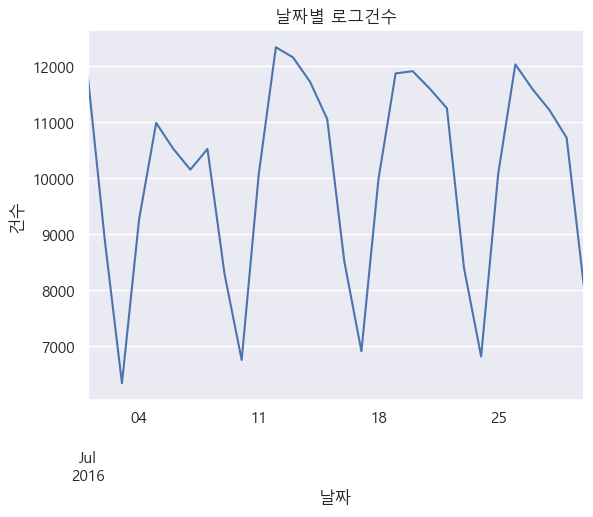

In [113]:
# 날짜별 로그수
log.groupby('datetime').size().plot()
plt.title('날짜별 로그건수')
plt.xlabel('날짜')
plt.ylabel('건수')

<Axes: xlabel='datetime'>

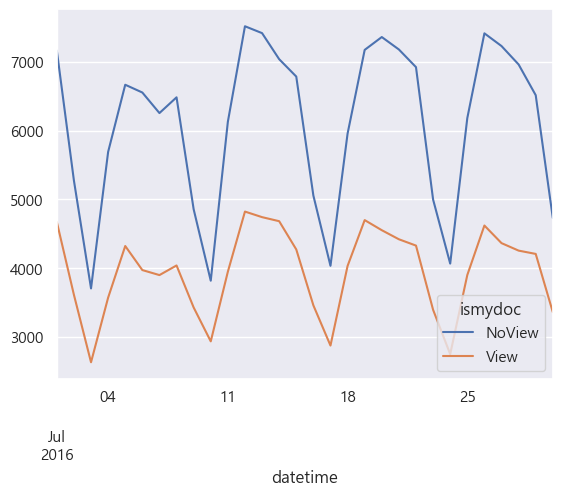

In [114]:
log.groupby(['datetime','ismydoc']).size().unstack().plot()

Text(0, 0.5, '건수')

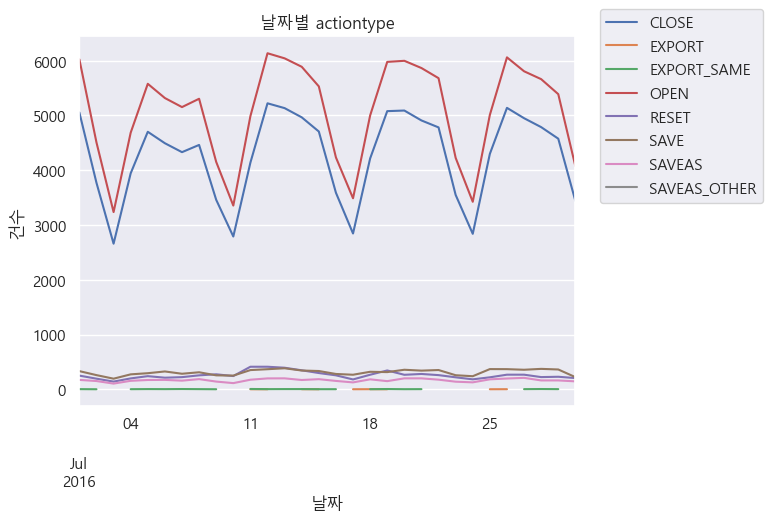

In [115]:
log.groupby(['datetime','actiontype']).size().unstack().plot()
plt.legend(loc=[1.05,0.55])
plt.title('날짜별 actiontype')
plt.xlabel('날짜')
plt.ylabel('건수')

<Axes: xlabel='datetime'>

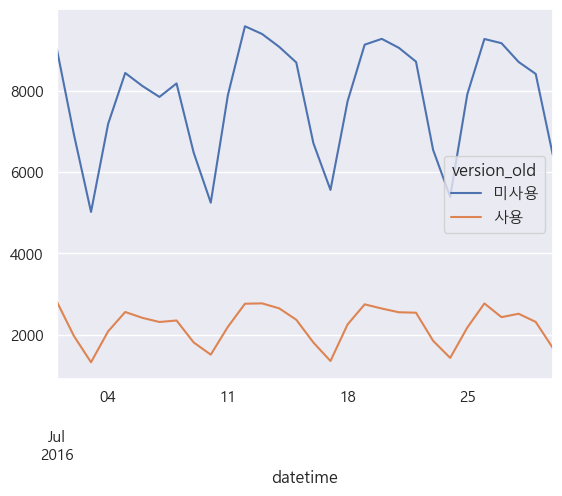

In [116]:
log.groupby(['datetime','version_old']).size().unstack().plot()

Text(0, 0.5, '건수')

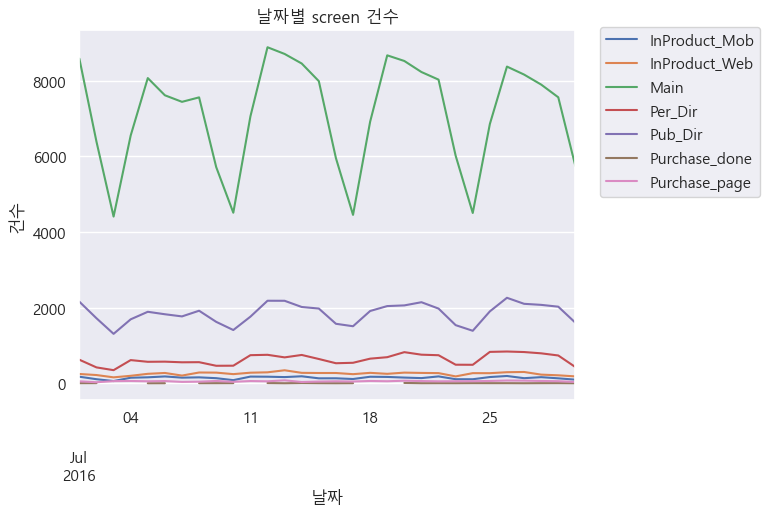

In [117]:
log.groupby(['datetime','screen']).size().unstack().plot()
plt.legend(loc=[1.05,0.55])
plt.title('날짜별 screen 건수')
plt.xlabel('날짜')
plt.ylabel('건수')

In [123]:
log.groupby('ext')['sessionid_new'].nunique().sort_values()/log.groupby('ext')['sessionid_new'].nunique().sort_values().sum()

ext
WORD     0.000007
PNG      0.000015
SHEET    0.000022
JPG      0.000066
PPS      0.001130
ODT      0.002782
PPSX     0.008904
PPT      0.019210
TXT      0.033899
PPTX     0.052221
DOC      0.082465
XLS      0.082729
HWP      0.083456
XLSX     0.173467
DOCX     0.183479
PDF      0.276147
Name: sessionid_new, dtype: float64

Text(0, 0.5, '건수')

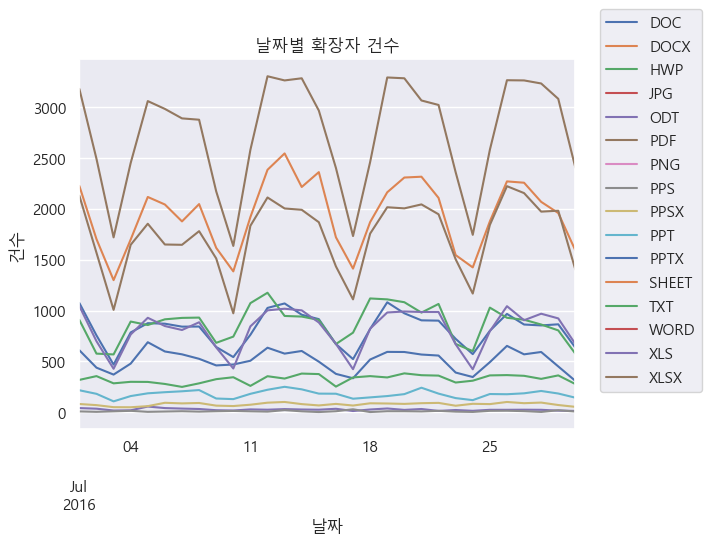

In [124]:
log.groupby(['datetime','ext']).size().unstack().plot()
plt.legend(loc=[1.05,0.1])
plt.title('날짜별 확장자 건수')
plt.xlabel('날짜')
plt.ylabel('건수')

Text(0, 0.5, '건수')

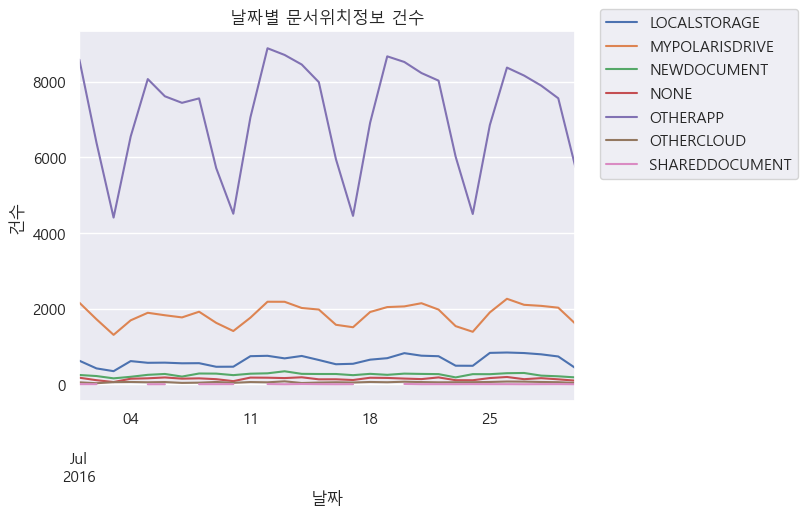

In [125]:
log.groupby(['datetime','documentposition']).size().unstack().plot()
plt.legend(loc=[1.05,0.6])
plt.title('날짜별 문서위치정보 건수')
plt.xlabel('날짜')
plt.ylabel('건수')

In [126]:
a= log.groupby('sessionid_new').agg({'week':'first'}).reset_index().groupby('week').size()
b=round(a/a.sum()*100)
b

week
Friday       18.0
Monday       13.0
Saturday     14.0
Sunday        9.0
Thursday     15.0
Tuesday      16.0
Wednesday    15.0
dtype: float64

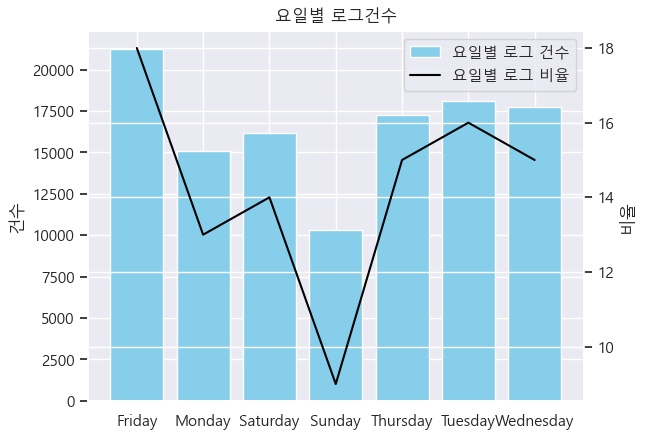

In [127]:
# 요일별 로그건수
fig, ax1 = plt.subplots()
ax1.bar(a.index, a, color='skyblue', label='요일별 로그 건수')
ax1.set_ylabel('건수')

ax2 = ax1.twinx()
ax2.plot(b.index, b, color='black', label='요일별 로그 비율')
ax2.set_ylabel('비율')

plt.title('요일별 로그건수')
plt.xlabel('요일')
plt.xticks(rotation=45, ha='right')  # x축 라벨 45도 회전, 오른쪽 정렬

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

Text(0, 0.5, 'actiontype')

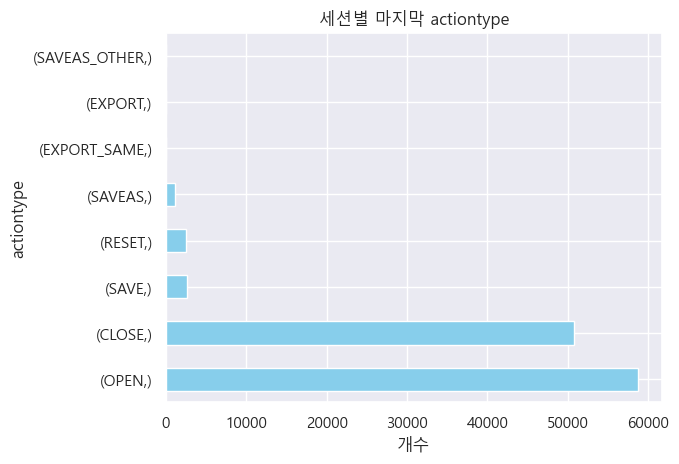

In [128]:
log.groupby('sessionid_new').agg({'actiontype':'last'}).value_counts().plot(kind='barh',color='skyblue')
plt.title('세션별 마지막 actiontype')
plt.xlabel('개수')
plt.ylabel('actiontype')

Text(0, 0.5, 'actiontype')

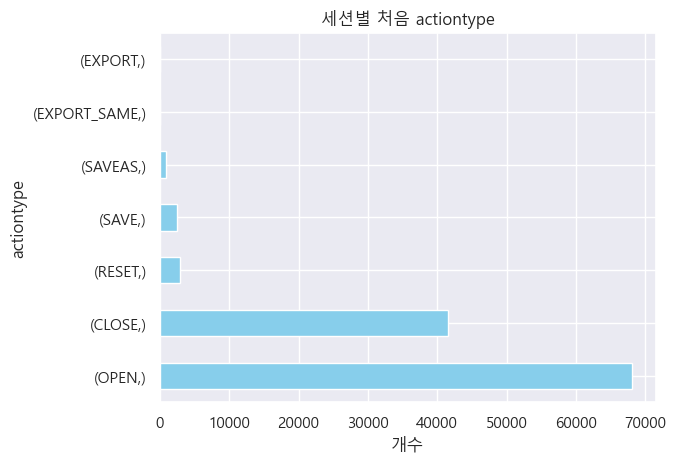

In [129]:
log.groupby('sessionid_new').agg({'actiontype':'first'}).value_counts().plot(kind='barh',color='skyblue')
plt.title('세션별 처음 actiontype')
plt.xlabel('개수')
plt.ylabel('actiontype')

(array([0, 1]), [Text(0, 0, '미사용'), Text(1, 0, '사용')])

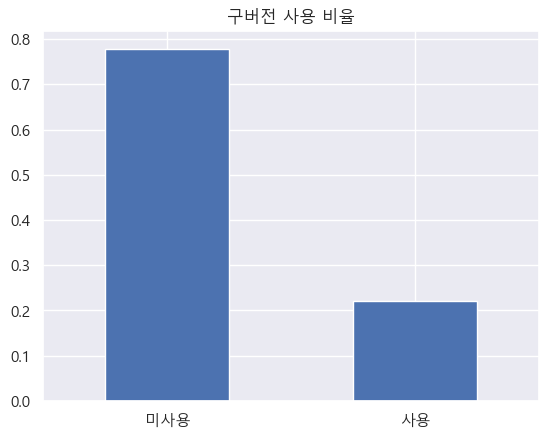

In [130]:
log.version_old.value_counts(normalize=True).plot.bar()
plt.title('구버전 사용 비율')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)

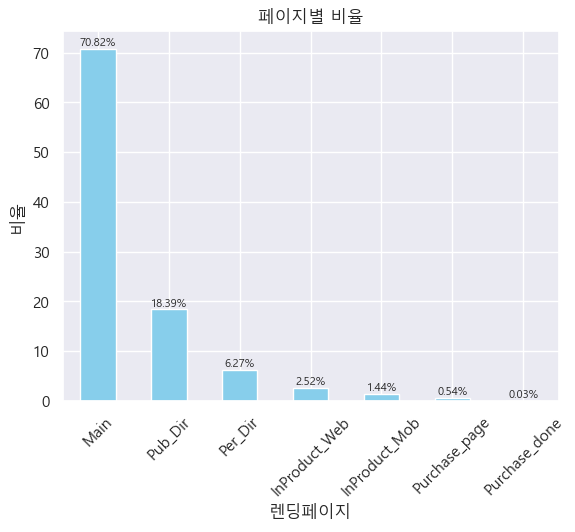

In [131]:
a=round(log.screen.value_counts(normalize=True)*100,2)
a.plot.bar(color='skyblue')
plt.title('페이지별 비율')
plt.xlabel('렌딩페이지')
plt.ylabel('비율')
plt.xticks(rotation=45);

for i, v in enumerate(a):
    plt.text(i, v, f"{v}%", ha='center', va='bottom', fontsize=8)

In [41]:
round(log.documentposition.value_counts(normalize=True)*100)

documentposition
OTHERAPP          71.0
MYPOLARISDRIVE    18.0
LOCALSTORAGE       6.0
NEWDOCUMENT        3.0
NONE               1.0
OTHERCLOUD         1.0
SHAREDDOCUMENT     0.0
Name: proportion, dtype: float64

Text(0, 0.5, '문서위치')

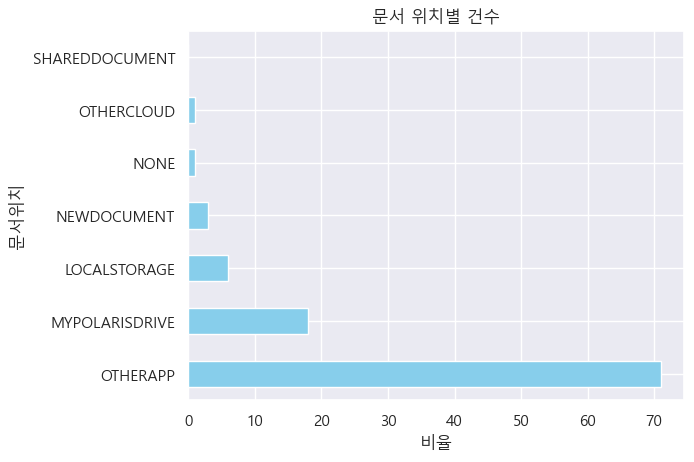

In [39]:
round(log.documentposition.value_counts(normalize=True)*100).plot(kind='barh',color='skyblue')
plt.title('문서 위치별 건수')
plt.xlabel('비율')
plt.ylabel('문서위치')

Text(215.25, 0.5, '날짜')

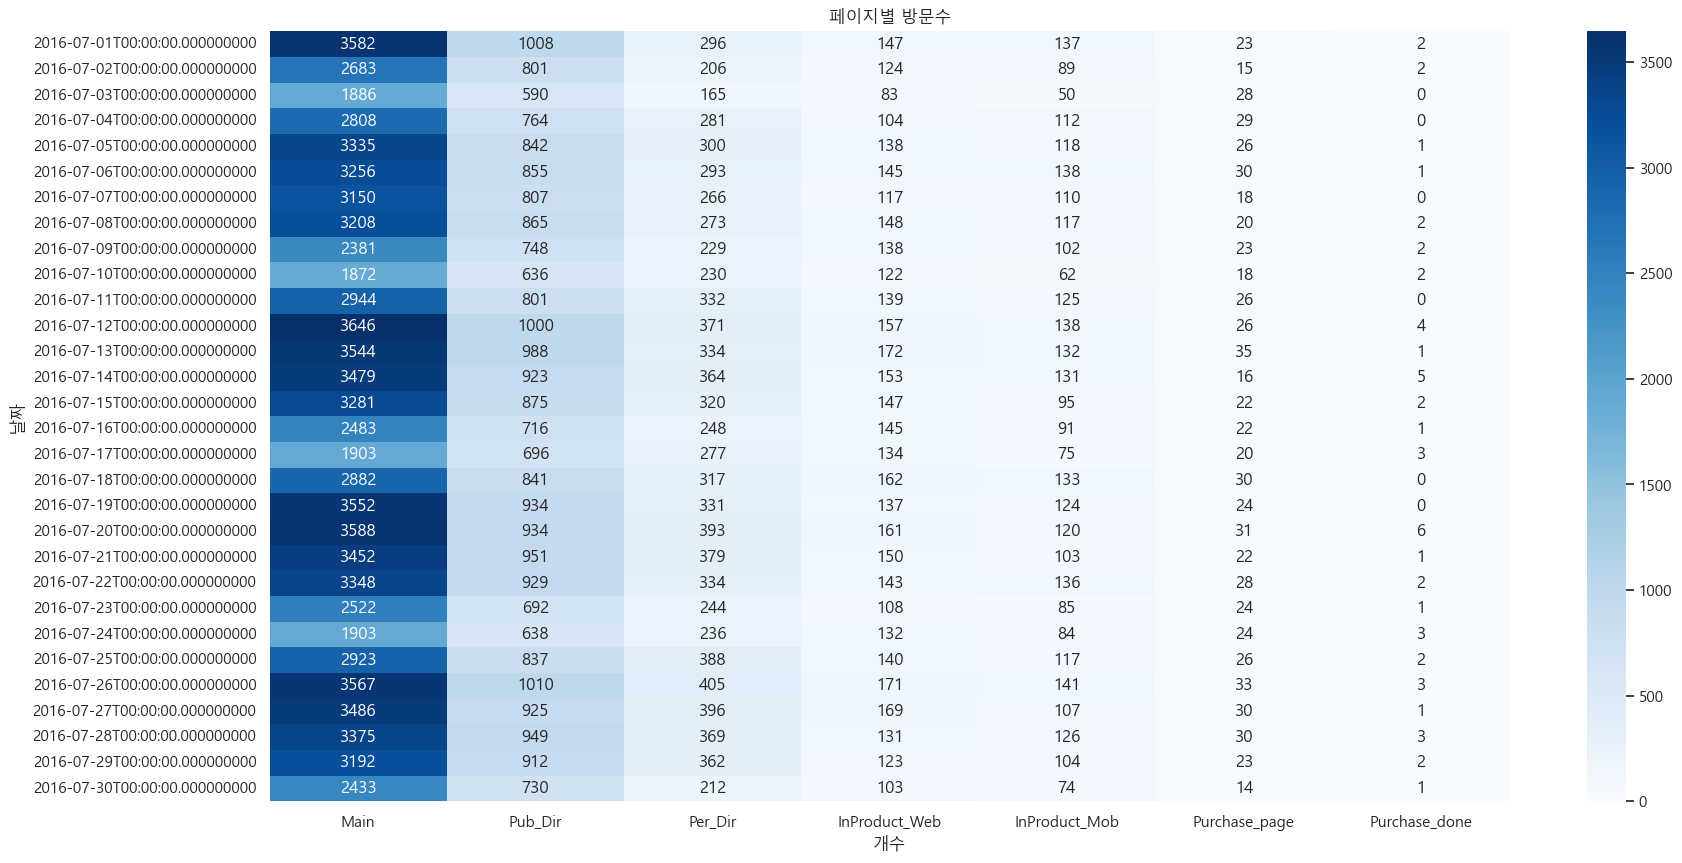

In [132]:
# 이탈률
plt.subplots(figsize=(20,10))
funnel = log.groupby(['datetime','screen'])['sessionid_new'].nunique().unstack().fillna(0).astype(int)
sns.heatmap(funnel[funnel.mean().sort_values(ascending=False).index], annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
plt.title('페이지별 방문수')
plt.xlabel('개수')
plt.ylabel('날짜')

In [135]:
last_p = log.groupby('sessionid_new').agg({'version_old':'last'}).reset_index()
last_p

,sessionid_new,version_old
0,1,미사용
1,2,미사용
2,3,미사용
3,4,미사용
4,5,미사용
...,...,...
115937,115938,미사용
115938,115939,미사용
115939,115940,미사용
115940,115941,미사용


In [138]:
last_p = log.groupby('sessionid_new').agg({'version_old':'last'}).reset_index()
log = log.merge(last_p, on='sessionid_new', how='left')
log

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,version_old_x,week,sessionid_new,version_old_y
0,OPEN,NoView,PDF,1,LOCALSTORAGE,2016-07-18,Per_Dir,미사용,Monday,1,미사용
1,CLOSE,NoView,PDF,1,LOCALSTORAGE,2016-07-18,Per_Dir,미사용,Monday,1,미사용
2,OPEN,View,PDF,1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,미사용,Monday,1,미사용
3,CLOSE,View,PDF,1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,미사용,Monday,1,미사용
4,OPEN,NoView,PDF,2,OTHERAPP,2016-07-06,Main,미사용,Wednesday,2,미사용
...,...,...,...,...,...,...,...,...,...,...,...
301856,CLOSE,View,XLSX,114992,OTHERAPP,2016-07-07,Main,미사용,Thursday,115940,미사용
301857,OPEN,NoView,DOCX,114993,OTHERAPP,2016-07-05,Main,미사용,Tuesday,115941,미사용
301858,RESET,View,DOCX,114993,OTHERAPP,2016-07-05,Main,미사용,Tuesday,115941,미사용
301859,OPEN,NoView,PPT,114994,OTHERAPP,2016-07-14,Main,미사용,Thursday,115942,미사용


In [142]:
log.groupby('sessionid_new').agg({'version_old_y':'first'}).value_counts()/log.groupby('sessionid_new').agg({'version_old_y':'first'}).value_counts().sum()


version_old_y
미사용              0.788153
사용               0.211847
Name: count, dtype: float64

In [160]:
funnel = log[log.version_old_y=='사용'].groupby(['datetime','screen'])['sessionid_new'].nunique().unstack().fillna(0).astype(int)
funnel = funnel.mean()
funnel = funnel[funnel.sort_values(ascending=False).index].reset_index()
funnel

,screen,0
0,Main,654.433333
1,Pub_Dir,174.200000
2,Per_Dir,57.300000
3,InProduct_Mob,20.333333
4,InProduct_Web,19.666667
5,Purchase_page,3.466667
6,Purchase_done,0.266667


Text(45.24999999999999, 0.5, '페이지')

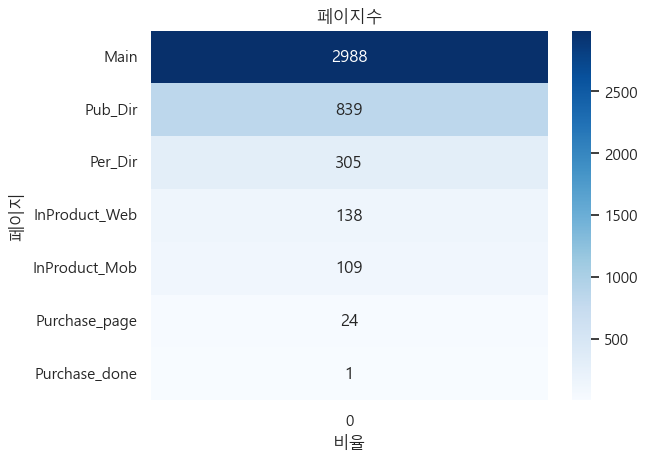

In [150]:

sns.heatmap(funnel.set_index('screen').astype(int),annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
plt.title('페이지수')
plt.xlabel('비율')
plt.ylabel('페이지')

In [145]:
s=[]
for i,j in enumerate(funnel.screen):
    if i<6:
        s.append(funnel['screen'][i]+'>'+funnel['screen'][i+1])

print(s)

['Main>Pub_Dir', 'Pub_Dir>Per_Dir', 'Per_Dir>InProduct_Web', 'InProduct_Web>InProduct_Mob', 'InProduct_Mob>Purchase_page', 'Purchase_page>Purchase_done']


In [161]:
# 구버전 사용
funnel['pre'] = funnel[0].shift(1)
funnel
funnel['diff'] = (funnel['pre'] - funnel[0]).shift(-1)
funnel['ratio'] = round(funnel['diff']/funnel[0]*100)
funnel_tmp = funnel[['screen','ratio']].set_index('screen').fillna(0).astype(int)
list(funnel_tmp['ratio'][:-1])
# sns.heatmap(funnel_tmp,annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
# plt.title('페이지별 이탈률')
# plt.xlabel('비율')
# plt.ylabel('페이지')

[73, 67, 65, 3, 82, 92]

In [159]:
# 뉴버전 사용
funnel['pre'] = funnel[0].shift(1)
funnel
funnel['diff'] = (funnel['pre'] - funnel[0]).shift(-1)
funnel['ratio'] = round(funnel['diff']/funnel[0]*100)
funnel_tmp = funnel[['screen','ratio']].set_index('screen').fillna(0).astype(int)
list(funnel_tmp['ratio'][:-1])
# sns.heatmap(funnel_tmp,annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
# plt.title('페이지별 이탈률')
# plt.xlabel('비율')
# plt.ylabel('페이지')

[71, 63, 52, 25, 76, 93]

Text(45.249999999999986, 0.5, '페이지')

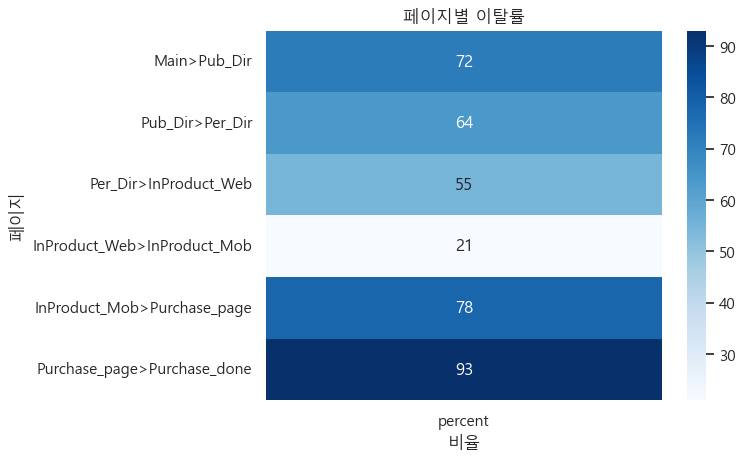

In [152]:
s2 = pd.Series(list(funnel_tmp['ratio'][:-1]),index=s)
s3 = pd.DataFrame(s2,columns=['percent'])
sns.heatmap(s3,annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
plt.title('페이지별 이탈률')
plt.xlabel('비율')
plt.ylabel('페이지')


In [155]:
# 유저의 재방문율
a=log.groupby('sessionid').agg({'datetime':['first','last']}).reset_index()
(a[a[('datetime','first')]!=a[('datetime','last')]][('sessionid','')].nunique()/log.groupby('datetime')['sessionid'].nunique().sum())*100

0.8133377033344259

In [157]:
log.groupby('datetime')['sessionid'].nunique().sum()

115942

In [162]:
from scipy.stats import chi2_contingency

# 그룹별 이탈률 데이터 
a_exit_rates = [73, 67, 65, 3, 82, 92]  # 구버전사용
b_exit_rates = [71, 63, 52, 25, 76, 93]  # 구버전미사용

# 데이터를 2x6의 행렬 형태로 변환
observed = [a_exit_rates, b_exit_rates]

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(observed)

# 결과 출력
print("카이제곱 검정 통계량:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("예상 빈도표:")
print(expected)

카이제곱 검정 통계량: 19.109149234921766
p-value: 0.0018341945943189026
자유도: 5
예상 빈도표:
[[72.18897638 65.17060367 58.65354331 14.03674541 79.20734908 92.74278215]
 [71.81102362 64.82939633 58.34645669 13.96325459 78.79265092 92.25721785]]


In [164]:
tmp = log.groupby('sessionid_new').agg({'datetime':['first','last']}).reset_index()
tmp['diff'] = tmp[('datetime', 'last')] - tmp[('datetime', 'first')]
tmp['diff'].describe()

count             115942
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
Name: diff, dtype: object